In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
#data collection and processing
#loading the data from csv file to pandas dataframe
big_mart_data = pd.read_csv('Train.csv')

In [3]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_mart_data.shape

(8523, 12)

In [5]:

big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [8]:
big_mart_data['Item_Weight'] = big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean())


In [9]:
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [10]:
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
miss_values = big_mart_data['Outlet_Size'].isnull()  

In [13]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [15]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
sns.set()

<Figure size 600x600 with 0 Axes>

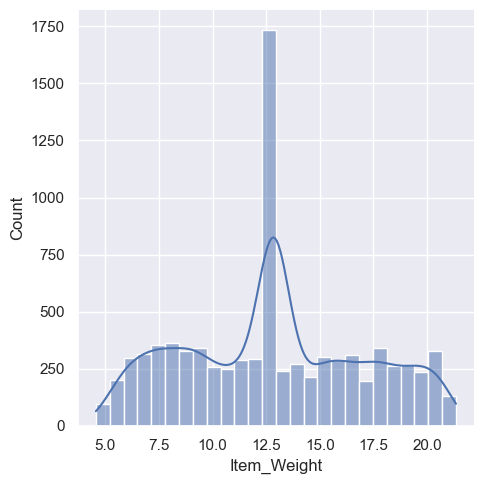

In [18]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Weight'], kde=True)
plt.show()

<Figure size 600x600 with 0 Axes>

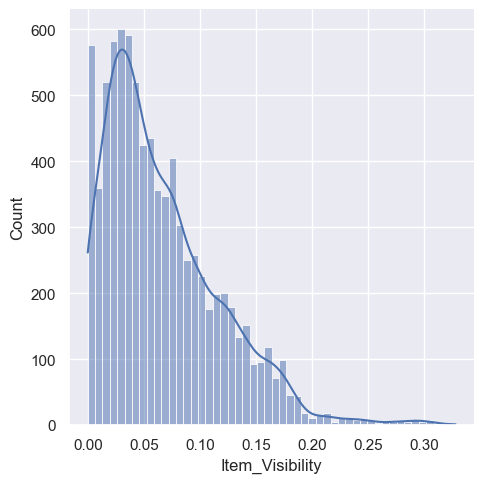

In [19]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Visibility'], kde=True)
plt.show()

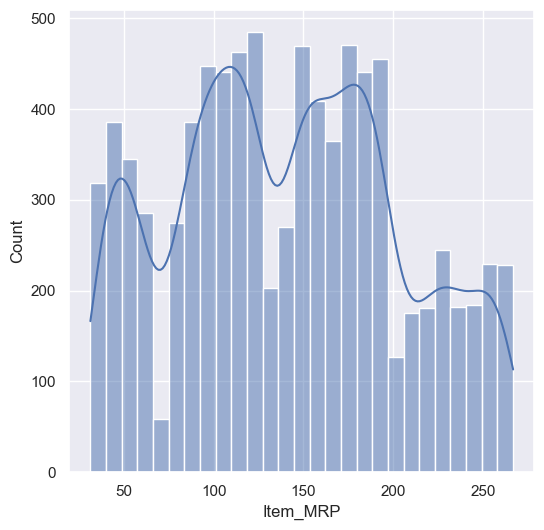

In [20]:
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_MRP'], kde=True)
plt.show()

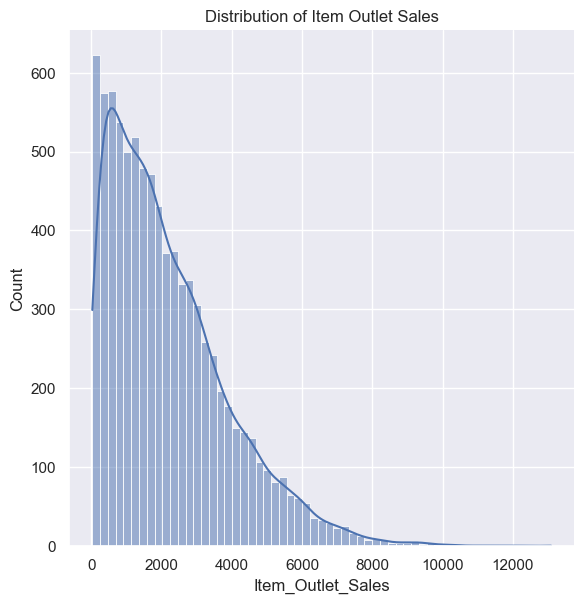

In [22]:
sns.displot(big_mart_data['Item_Outlet_Sales'], kde=True, height=6, aspect=1)
plt.title("Distribution of Item Outlet Sales")
plt.show()


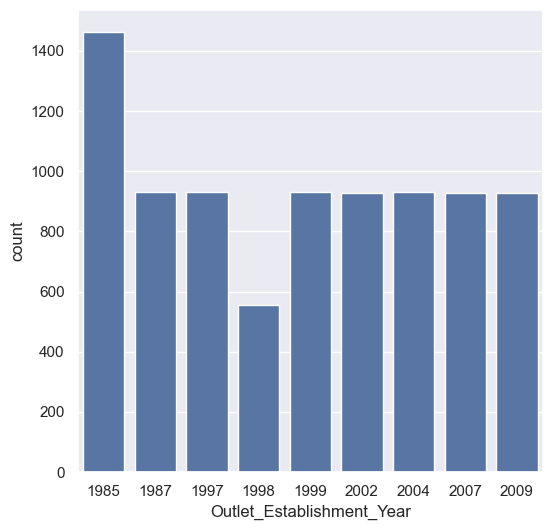

In [23]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

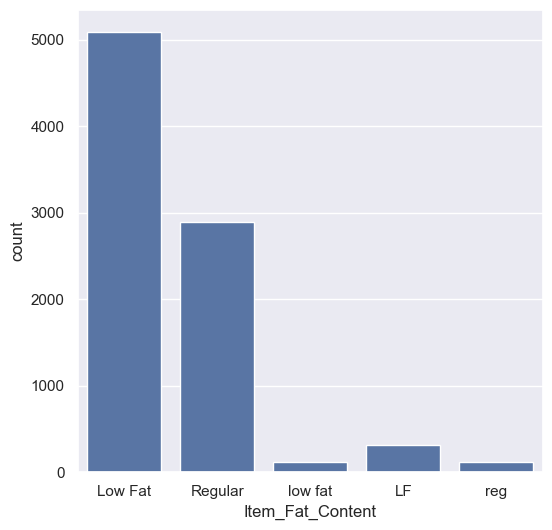

In [24]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

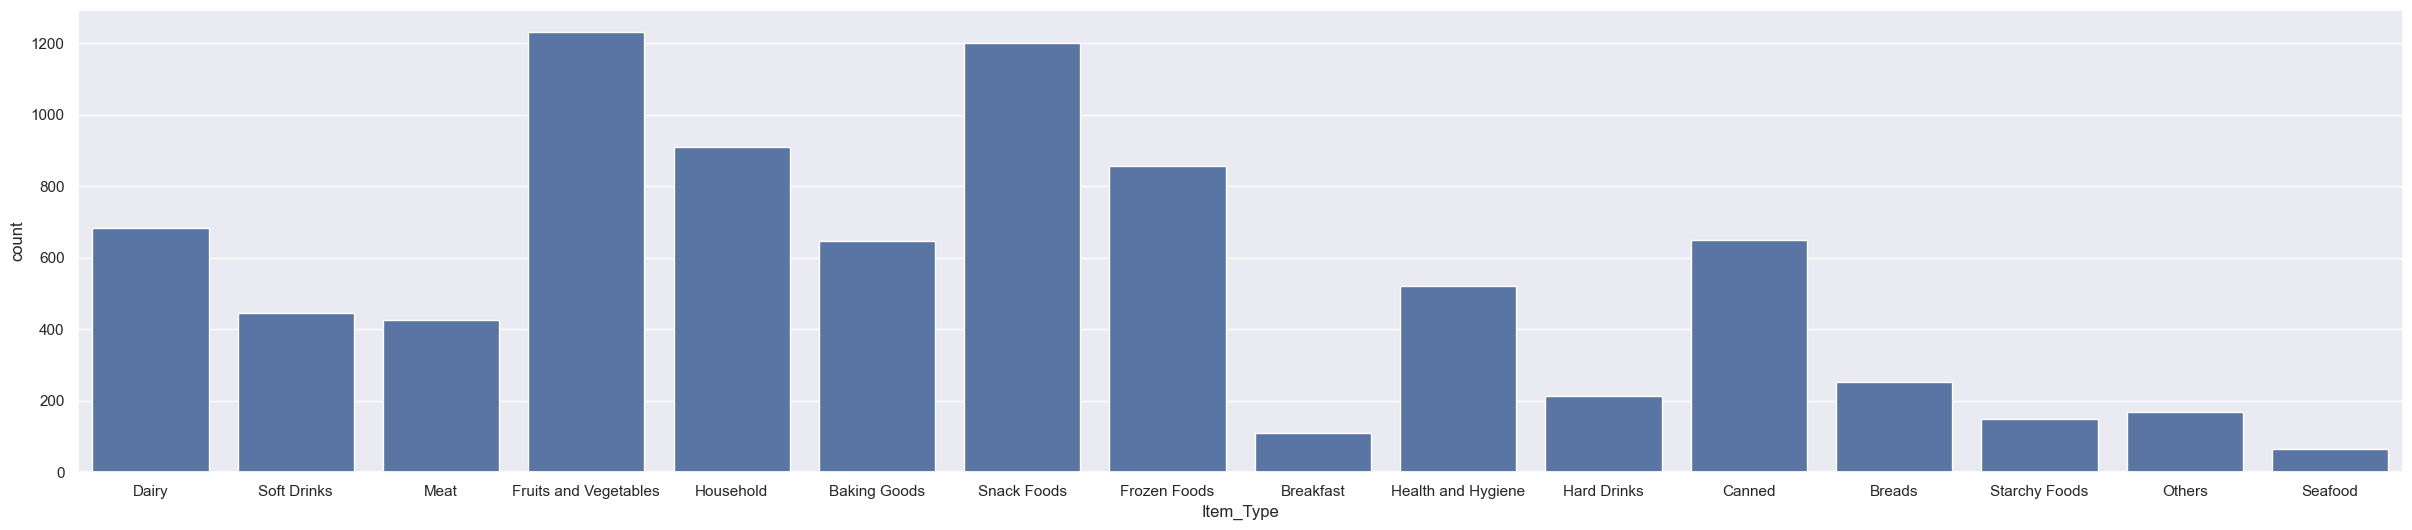

In [25]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

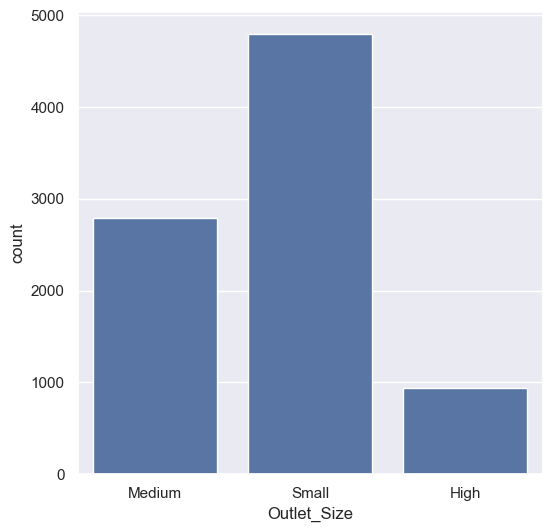

In [26]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

In [27]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [29]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [30]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [31]:
import klib

GridSpec(6, 7)

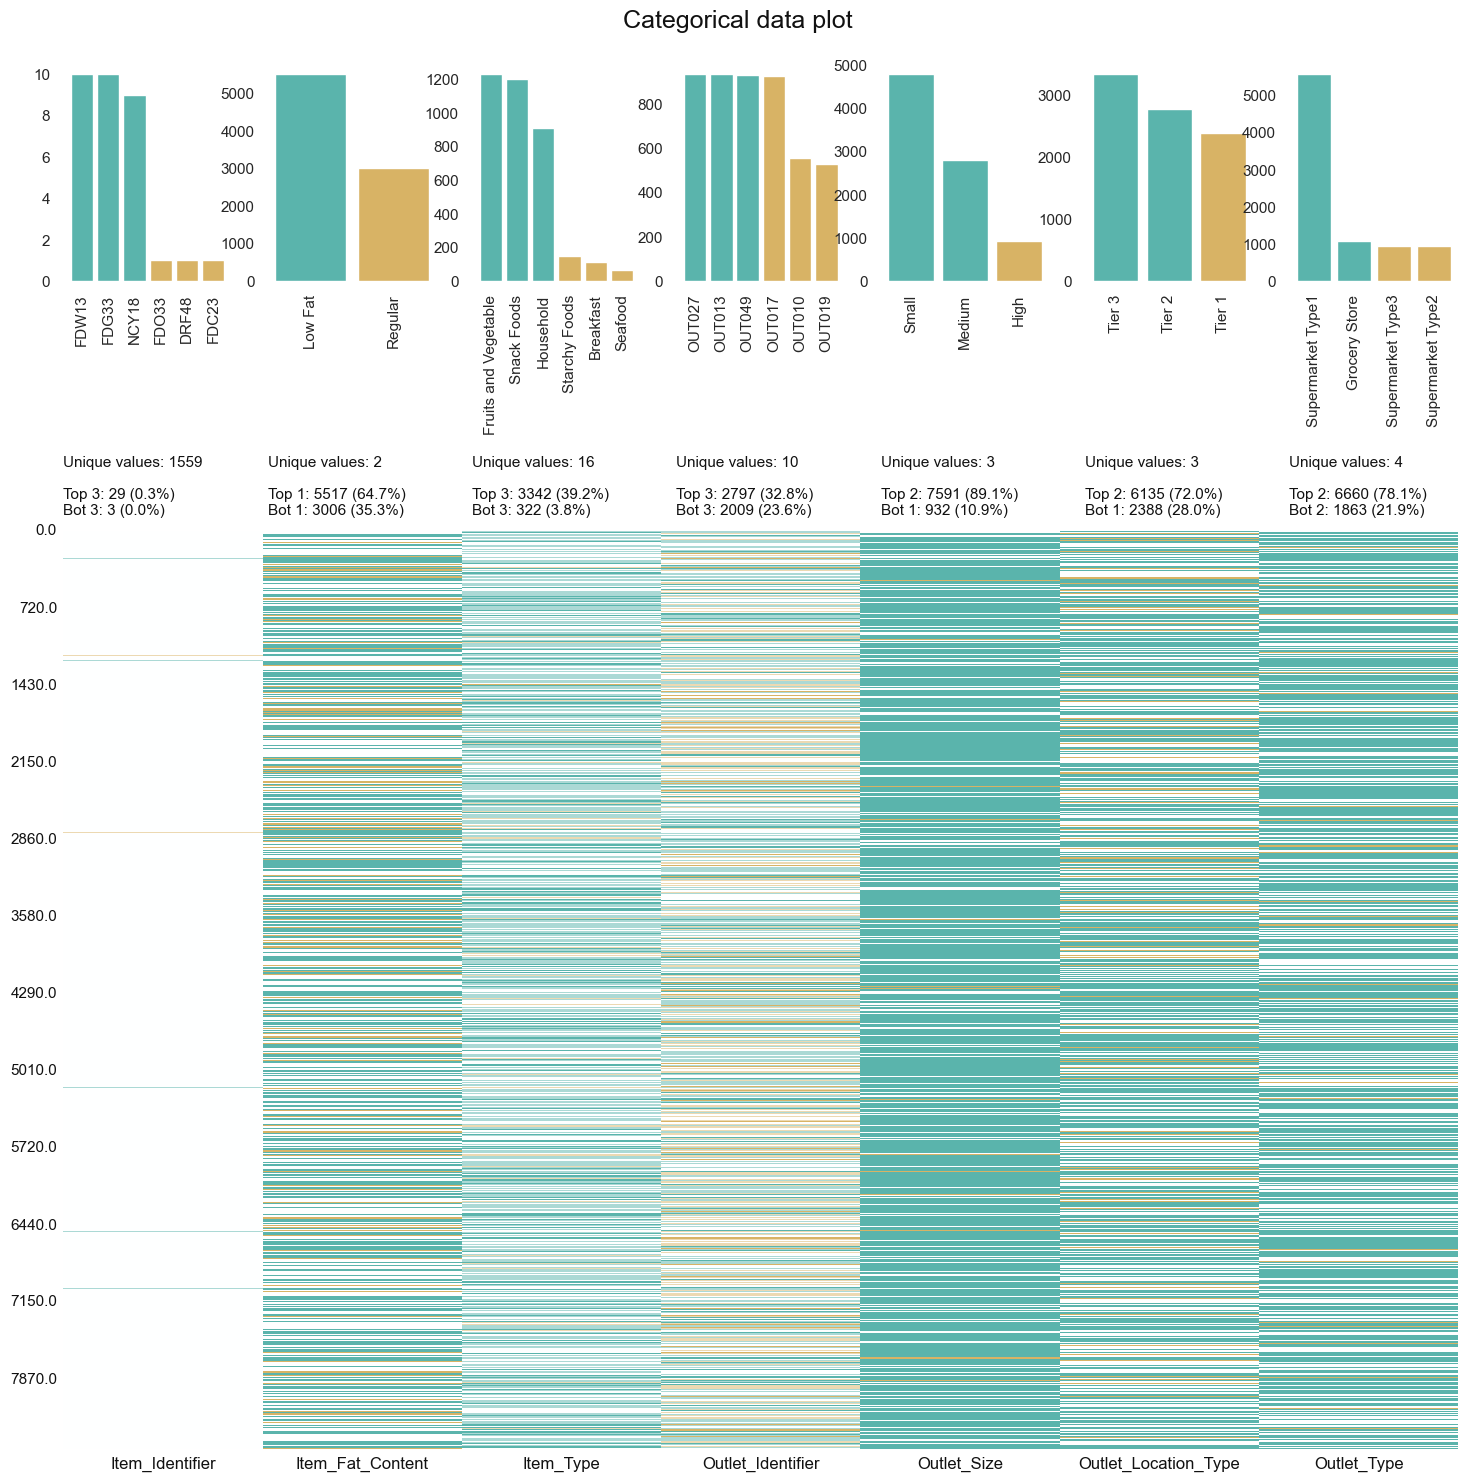

In [32]:
klib.cat_plot(big_mart_data)

In [33]:
klib.missingval_plot(big_mart_data) 

No missing values found in the dataset.


In [34]:
klib.clean_column_names(big_mart_data)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [35]:
big_mart_data=klib.convert_datatypes(big_mart_data) # converts existing to more efficient dtypes, also called inside data_cleaning()
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_identifier            8523 non-null   string  
 1   item_weight                8523 non-null   float32 
 2   item_fat_content           8523 non-null   category
 3   item_visibility            8523 non-null   float32 
 4   item_type                  8523 non-null   category
 5   item_mrp                   8523 non-null   float32 
 6   outlet_identifier          8523 non-null   category
 7   outlet_establishment_year  8523 non-null   int16   
 8   outlet_size                8523 non-null   category
 9   outlet_location_type       8523 non-null   category
 10  outlet_type                8523 non-null   category
 11  item_outlet_sales          8523 non-null   float32 
dtypes: category(6), float32(4), int16(1), string(1)
memory usage: 268.1 KB


In [36]:
klib.mv_col_handling(big_mart_data)

C:\Users\prati\AppData\Local\Programs\Python\Python312\Lib\site-packages\klib\clean.py:443: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_local[cols_mv] = data_local[cols_mv].applymap(lambda x: x if pd.isna(x) else 1).fillna(0)


,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,FDX07,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,OUT010,1998,Small,Tier 3,Grocery Store,732.380005
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.521805,OUT013,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.156998,OUT045,2002,Small,Tier 2,Supermarket Type1,549.284973
8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.133202,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [37]:
encoder = LabelEncoder()

In [38]:
big_mart_data['item_identifier'] = encoder.fit_transform(big_mart_data['item_identifier'])

big_mart_data['item_fat_content'] = encoder.fit_transform(big_mart_data['item_fat_content'])

big_mart_data['item_type'] = encoder.fit_transform(big_mart_data['item_type'])

big_mart_data['outlet_identifier'] = encoder.fit_transform(big_mart_data['outlet_identifier'])

big_mart_data['outlet_size'] = encoder.fit_transform(big_mart_data['outlet_size'])

big_mart_data['outlet_location_type'] = encoder.fit_transform(big_mart_data['outlet_location_type'])

big_mart_data['outlet_type'] = encoder.fit_transform(big_mart_data['outlet_type'])

In [39]:
big_mart_data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,156,9.300000,0,0.016047,4,249.809204,9,1999,1,0,1,3735.137939
1,8,5.920000,1,0.019278,14,48.269199,3,2009,1,2,2,443.422791
2,662,17.500000,0,0.016760,10,141.617996,9,1999,1,0,1,2097.270020
3,1121,19.200001,1,0.000000,6,182.095001,0,1998,2,2,0,732.380005
4,1297,8.930000,0,0.000000,9,53.861401,1,1987,0,2,1,994.705200


In [40]:
X = big_mart_data.drop(columns='item_outlet_sales', axis=1)
Y = big_mart_data['item_outlet_sales']

In [41]:
print(X)

      item_identifier  item_weight  item_fat_content  item_visibility  \
0                 156     9.300000                 0         0.016047   
1                   8     5.920000                 1         0.019278   
2                 662    17.500000                 0         0.016760   
3                1121    19.200001                 1         0.000000   
4                1297     8.930000                 0         0.000000   
...               ...          ...               ...              ...   
8518              370     6.865000                 0         0.056783   
8519              897     8.380000                 1         0.046982   
8520             1357    10.600000                 0         0.035186   
8521              681     7.210000                 1         0.145221   
8522               50    14.800000                 0         0.044878   

      item_type    item_mrp  outlet_identifier  outlet_establishment_year  \
0             4  249.809204                  9

In [42]:
print(Y)

0       3735.137939
1        443.422791
2       2097.270020
3        732.380005
4        994.705200
           ...     
8518    2778.383301
8519     549.284973
8520    1193.113647
8521    1845.597656
8522     765.669983
Name: item_outlet_sales, Length: 8523, dtype: float32


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [45]:
regressor = XGBRegressor()

In [46]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
training_data_prediction = regressor.predict(X_train)

In [48]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [49]:
print('R Squared value = ', r2_train)

R Squared value =  0.8762174614076754


In [50]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [51]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [52]:
print('R Squared value = ', r2_test)

R Squared value =  0.5017253962155546


In [53]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [54]:
X_train_std= sc.fit_transform(X_train)

In [55]:
X_test_std= sc.transform(X_test)
X_train_std

array([[-0.33996056, -0.24151056,  1.36378126, ...,  0.79358899,
        -1.36460015, -0.24534917],
       [ 0.48097841,  0.00834019, -0.73325542, ..., -0.66836447,
         1.09868919,  2.27771359],
       [ 0.77242287, -1.20416062, -0.73325542, ...,  0.79358899,
        -1.36460015, -0.24534917],
       ...,
       [ 0.42090971,  1.38849815,  1.36378126, ...,  0.79358899,
        -0.13295548, -0.24534917],
       [-1.61252721, -0.93131131, -0.73325542, ...,  0.79358899,
        -0.13295548, -0.24534917],
       [ 1.0727664 , -1.46283584,  1.36378126, ..., -0.66836447,
         1.09868919,  1.01618221]])

In [56]:
X_test_std

array([[-0.63140502,  0.00834019, -0.73325542, ..., -0.66836447,
         1.09868919,  2.27771359],
       [-0.88502844, -0.1588291 , -0.73325542, ...,  0.79358899,
        -0.13295548, -0.24534917],
       [ 0.95040422, -1.65890932, -0.73325542, ...,  0.79358899,
        -0.13295548, -0.24534917],
       ...,
       [ 1.1261608 ,  1.48299131, -0.73325542, ...,  0.79358899,
        -0.13295548, -0.24534917],
       [-0.05296564,  1.38849815, -0.73325542, ..., -0.66836447,
         1.09868919,  1.01618221],
       [ 0.14503861, -1.42740085,  1.36378126, ...,  0.79358899,
        -0.13295548, -0.24534917]])

In [57]:
Y_train

7173    1662.502563
3315    2956.152100
5932    2490.092041
7872     988.713013
5946      45.940201
           ...     
1099    1957.452026
2514    2013.379150
6637    2006.721191
2575    1372.213745
7336    1830.949951
Name: item_outlet_sales, Length: 6818, dtype: float32

In [58]:
Y_test

1112    1544.656006
1751    6404.996094
7648    1070.606445
7362     369.519012
5332     101.201599
           ...     
3503    4255.793457
975     1222.408813
6190    1551.979858
32      3068.006348
4433    5480.865723
Name: item_outlet_sales, Length: 1705, dtype: float32

In [59]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [60]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [61]:
X_test.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
1112,496,12.857645,0,0.099747,6,75.232803,5,1985,1,2,3
1751,382,12.150000,0,0.131446,5,246.845993,7,2002,2,1,1
7648,1207,5.800000,0,0.131221,4,87.817200,7,2002,2,1,1
7362,1415,17.000000,0,0.087388,8,125.072998,0,1998,2,2,0
5332,910,12.857645,0,0.009585,5,102.501602,4,1985,2,0,0


In [62]:
Y_pred_lr=lr.predict(X_test_std)

In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [64]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.4891298697748344
944.8691707719355
1255.8241329137084


In [65]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [66]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [67]:
Y_pred_rf=rf.predict(X_test_std)

In [167]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5547394344321913
821.3539420508802
1172.4131634497462


In [162]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.556 using {'n_estimators': 1000}
0.518 (0.014) with: {'n_estimators': 10}
0.553 (0.004) with: {'n_estimators': 100}
0.556 (0.005) with: {'n_estimators': 1000}


In [163]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [164]:

grid_search_forest.best_score_

0.5560250667803671

In [83]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)


In [84]:

r2_score(Y_test,Y_pred_rf_grid)

0.5548721383744948